In [3]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Delhi Air Quality Project - Starting Analysis")

Delhi Air Quality Project - Starting Analysis


In [4]:
# Loading AQI data
aqi_df = pd.read_csv('../data/raw/aqi.csv')
print("Data Loaded Successfully - Here are the columns:")
print(aqi_df.columns)


Data Loaded Successfully - Here are the columns:
Index(['date', 'state', 'area', 'number_of_monitoring_stations',
       'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit',
       'note'],
      dtype='object')


In [5]:
delhi_aqi = (
    aqi_df[
        aqi_df['state']
        .str.contains('delhi', case=False, na=False)
    ]
    .reset_index(drop=True)
)

# Preprocess date column and sort by date

delhi_aqi['date'] = pd.to_datetime(delhi_aqi['date'], format='%d-%m-%Y')
delhi_aqi = delhi_aqi.sort_values(by='date').reset_index(drop=True)

#handle missing values
print("missing values in delhi_aqi:", delhi_aqi.isnull().sum())

delhi_aqi['aqi_value'] = pd.to_numeric(delhi_aqi['aqi_value'], errors='coerce')
delhi_aqi = delhi_aqi.dropna(subset=['aqi_value'])

#check for duplicates
print("Duplicates in delhi_aqi:", delhi_aqi.duplicated().sum())

#removing unnecessary columns
delhi_aqi = delhi_aqi.drop(columns=['note'])



missing values in delhi_aqi: date                                0
state                               0
area                                0
number_of_monitoring_stations       0
prominent_pollutants                0
aqi_value                           0
air_quality_status                  0
unit                                0
note                             1125
dtype: int64
Duplicates in delhi_aqi: 0


In [6]:
print("\nAQI Data Summary:")


print(f"   AQI data: {delhi_aqi['date'].min().date()} to {delhi_aqi['date'].max().date()}")
print(f"   Total days: {len(aqi_df)}")
print(f"   Columns: {aqi_df.columns.tolist()}")
print("\nSample Data:")
print(aqi_df.head())
print(aqi_df.describe())

#Saving cleaned AQI data
delhi_aqi.to_csv('../data/processed/delhi_aqi_cleaned.csv', index=False)
print("Cleaned Delhi AQI data saved to '../data/processed/delhi_aqi_cleaned.csv'")


AQI Data Summary:
   AQI data: 2022-04-01 to 2025-04-30
   Total days: 235785
   Columns: ['date', 'state', 'area', 'number_of_monitoring_stations', 'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit', 'note']

Sample Data:
         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  \
0                 PM10         78       Satisfactory   
1                   CO         56       Satisfactory   
2                   O3         98       Satisfactory   
3                 PM10        103           Moderate   
4                PM2.5         61   

In [7]:
# Loading weather data
weather_df = pd.read_csv('../data/raw/weather.csv')

weather_df.columns = [col.split(' (')[0] if '(' in col else col for col in weather_df.columns]

# Rename for simplicity
weather_df = weather_df.rename(columns={
    'time': 'date',
    'windspeed_10m_max': 'wind_speed_kmh',
    'precipitation_sum': 'precipitation_mm',
    'relative_humidity_2m_mean': 'humidity_percent'
})

#handle missing values
print("missing values in weather_df:", weather_df.isnull().sum())   

#check for duplicates
print("Duplicates in weather_df:", weather_df.duplicated().sum())

# Preprocess date column and sort by date
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df = weather_df.sort_values('date').reset_index(drop=True)

# Convert wind speed from km/h to m/s (standard for pollution studies)
weather_df['wind_speed'] = weather_df['wind_speed_kmh'] * 0.27778
weather_df = weather_df.drop(columns=['wind_speed_kmh'])

missing values in weather_df: date                   0
temperature_2m_max     0
temperature_2m_min     0
temperature_2m_mean    0
precipitation_mm       0
wind_speed_kmh         0
humidity_percent       0
dtype: int64
Duplicates in weather_df: 0


In [8]:
print("\nWeather Data Summary:")


print(f"   Weather data: {weather_df['date'].min().date()} to {weather_df['date'].max().date()}")
print(f"   Total days: {len(weather_df)}")
print(f"   Columns: {weather_df.columns.tolist()}")
print("\nSample Data:")
print(aqi_df.head())
print(aqi_df.describe())

#Saving cleaned weather data
weather_df.to_csv('../data/processed/delhi_weather_cleaned.csv', index=False)
print("Cleaned Delhi weather data saved to '../data/processed/delhi_weather_cleaned.csv'")


Weather Data Summary:
   Weather data: 2022-04-01 to 2025-04-30
   Total days: 1126
   Columns: ['date', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed']

Sample Data:
         date           state      area  number_of_monitoring_stations  \
0  30-04-2025     Maharashtra  Amravati                              2   
1  30-04-2025           Bihar    Purnia                              1   
2  30-04-2025  Madhya Pradesh     Katni                              1   
3  30-04-2025    Chhattisgarh   Tumidih                              1   
4  30-04-2025           Assam  Byrnihat                              1   

  prominent_pollutants  aqi_value air_quality_status  \
0                 PM10         78       Satisfactory   
1                   CO         56       Satisfactory   
2                   O3         98       Satisfactory   
3                 PM10        103           Moderate   
4                PM2.5         61 

In [22]:
# . MERGE DATASETS
print("\n3. Merging AQI + Weather data...")
merged = pd.merge(delhi_aqi, weather_df, on='date', how='inner')

print(f"   Merged days: {len(merged)}")
print(f"   Common period: {merged['date'].min().date()} to {merged['date'].max().date()}")

print(f" Original shape of Merged Dataset: {merged.shape}")
print("\nOriginal columns:")
print(merged.columns.tolist())

# Check for missing data
missing_cols = merged.isnull().sum()
if missing_cols.sum() > 0:
    print(f"Missing values:\n{missing_cols[missing_cols > 0]}")
else:
    print("No missing values!")

# Rename columns for clarity

merged = merged.rename(columns={
    'aqi_value': 'AQI',  
    'air_quality_status': 'aqi_category',
})


# cleaning the 'unit' column (it's messy)

print("\nUnique values in 'unit' column:")
print(merged['unit'].unique())

# It appears to be static
if merged['unit'].nunique() == 1:  # If all values are the same
    merged = merged.drop(columns=['unit'])
    print("Dropped 'unit' column (redundant)")

# Extract individual pollutants from the string
def extract_pollutants(pollutant_str):
    """Extract list of pollutants from comma-separated string"""
    if pd.isna(pollutant_str):
        return []
    return [p.strip() for p in pollutant_str.split(',')]

merged['pollutants_list'] = merged['prominent_pollutants'].apply(extract_pollutants)
merged['pollutants_list'].head()

# Create binary columns for each pollutant
all_pollutants = set()
for pollutants in merged['pollutants_list']:
    all_pollutants.update(pollutants)

print(f"\nUnique pollutants found: {all_pollutants}")

# Create indicator columns
for pollutant in all_pollutants:
    merged[f'has_{pollutant}'] = merged['pollutants_list'].apply(lambda x: pollutant in x)
print("\nCreated binary columns for each pollutant.")


print("\nFinal columns after processing:")
print(merged.columns.tolist())



3. Merging AQI + Weather data...
   Merged days: 1125
   Common period: 2022-04-01 to 2025-04-30
 Original shape of Merged Dataset: (1125, 14)

Original columns:
['date', 'state', 'area', 'number_of_monitoring_stations', 'prominent_pollutants', 'aqi_value', 'air_quality_status', 'unit', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed']
No missing values!

Unique values in 'unit' column:
['number_of_monitoring_stations in Absolute Number, aqi_value in Indices']
Dropped 'unit' column (redundant)

Unique pollutants found: {'PM10', 'CO', 'NO2', 'PM2.5', 'O3'}

Created binary columns for each pollutant.

Final columns after processing:
['date', 'state', 'area', 'number_of_monitoring_stations', 'prominent_pollutants', 'AQI', 'aqi_category', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed', 'pollutants_list', 'has_PM10', 'has_CO', 'has_NO2', 'has_PM2.5

In [26]:
#Adding time based features:

merged['date'] = pd.to_datetime(merged['date'])
merged['year'] = merged['date'].dt.year
merged['month'] = merged['date'].dt.month
merged['day_of_week'] = merged['date'].dt.dayofweek  
merged['is_weekend'] = merged['day_of_week'].isin([5, 6]).astype(int)  # 5=Saturday, 6=Sunday


# Add seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5, 6]:
        return 'Summer'
    elif month in [7, 8, 9]:
        return 'Monsoon'
    else:
        return 'Autumn'

merged['season'] = merged['month'].apply(get_season)

In [51]:
# Reorder columns logically
column_order = [
    'date', 'year', 'month', 'season', 'day_of_week', 'is_weekend',
    'state', 'area', 'number_of_monitoring_stations',
    'AQI', 'aqi_category',
    'prominent_pollutants', 'pollutants_list',
    'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
    'precipitation_mm', 'humidity_percent', 'wind_speed'
] + [f'has_{p}' for p in all_pollutants]

# Select and reorder
df_clean = merged[column_order]

print("\nFinal cleaned dataset columns:")
print(df_clean.columns.tolist())

# Save cleaned version
df_clean.to_csv('../data/processed/final_delhi_aqi_weather_merged_final.csv', index=False)

print("\n" + "="*50)
print("CLEANING COMPLETE!")
print("="*50)
print(f"\nColumns: {merged.shape[1]} columns")
print(f"\nNew columns added:")
print(f"- pollutants_list (extracted from string)")
print(f"- has_PM10, has_PM2.5, etc. (indicator columns)")
print(f"- year, month, season, day_of_week, is_weekend")
print(f"- aqi_category (verified/created)")
print(f"\nSaved as 'final_delhi_aqi_weather_merged_final.csv'")



Final cleaned dataset columns:
['date', 'year', 'month', 'season', 'day_of_week', 'is_weekend', 'state', 'area', 'number_of_monitoring_stations', 'AQI', 'aqi_category', 'prominent_pollutants', 'pollutants_list', 'temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean', 'precipitation_mm', 'humidity_percent', 'wind_speed', 'has_PM10', 'has_CO', 'has_NO2', 'has_PM2.5', 'has_O3']

CLEANING COMPLETE!

Columns: 24 columns

New columns added:
- pollutants_list (extracted from string)
- has_PM10, has_PM2.5, etc. (indicator columns)
- year, month, season, day_of_week, is_weekend
- aqi_category (verified/created)

Saved as 'final_delhi_aqi_weather_merged_final.csv'


In [34]:
# --------------------------------------------------------------------
# 1. BASIC STATISTICS
# --------------------------------------------------------------------
print("\n" + "="*50)
print("1. BASIC STATISTICS")
print("="*50)

# AQI Statistics
aqi_stats = merged['AQI'].describe()
print(f"\n AQI Statistics:")
print(f"   Average: {aqi_stats['mean']:.0f}")
print(f"   Minimum: {aqi_stats['min']:.0f} (Best day)")
print(f"   Maximum: {aqi_stats['max']:.0f} (Worst day)")
print(f"   Standard Deviation: {aqi_stats['std']:.0f}")

# Weather Statistics
print(f"\n Weather Statistics:")
if 'temperature_2m_mean' in merged.columns:
    print(f"   Avg Temperature: {merged['temperature_2m_mean'].mean():.1f}°C")
    print(f"   Range: {merged['temperature_2m_mean'].min():.1f}°C to {merged['temperature_2m_mean'].max():.1f}°C")

if 'wind_speed_ms' in merged.columns:
    print(f"   Avg Wind Speed: {merged['wind_speed_ms'].mean():.1f} m/s")
elif 'wind_speed_kmh' in merged.columns:
    merged['wind_speed_ms'] = merged['wind_speed_kmh'] * 0.27778
    print(f"   Avg Wind Speed: {merged['wind_speed_ms'].mean():.1f} m/s (converted from km/h)")

if 'precipitation_mm' in merged.columns:
    rainy_days = (merged['precipitation_mm'] > 0).sum()
    print(f"   Rainy Days: {rainy_days} ({rainy_days/len(merged)*100:.1f}% of days)")
    print(f"   Max Daily Rain: {merged['precipitation_mm'].max():.1f} mm")

if 'humidity_percent' in merged.columns:
    print(f"   Avg Humidity: {merged['humidity_percent'].mean():.0f}%")


1. BASIC STATISTICS

 AQI Statistics:
   Average: 206
   Minimum: 44 (Best day)
   Maximum: 494 (Worst day)
   Standard Deviation: 101

 Weather Statistics:
   Avg Temperature: 24.9°C
   Range: 8.2°C to 39.2°C
   Rainy Days: 383 (34.0% of days)
   Max Daily Rain: 116.0 mm
   Avg Humidity: 60%


In [ ]:
# --------------------------------------------------------------------
#  VISUALIZATIONS
# --------------------------------------------------------------------

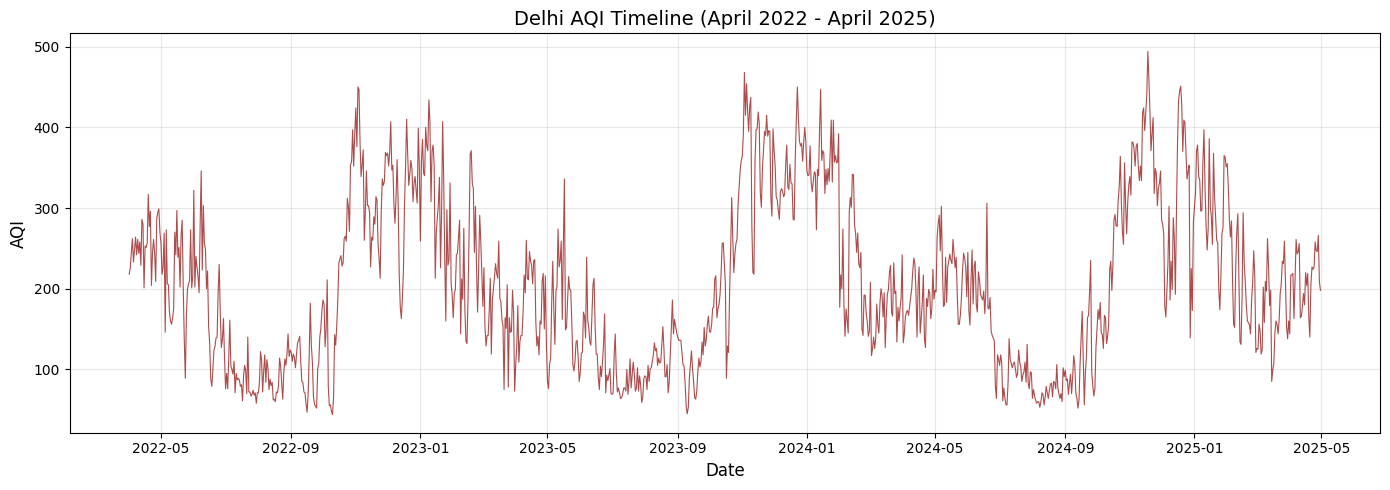

In [50]:
# Chart 1: AQI Over time (time series)

plt.figure(figsize=(14,5))
plt.plot(merged['date'],merged["AQI"], linewidth=0.8, color='darkred', alpha=0.7)
plt.title("Delhi AQI Timeline (April 2022 - April 2025)", fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AQI',fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/outputs/01_aqi_timeline.png', dpi=300, bbox_inches='tight')


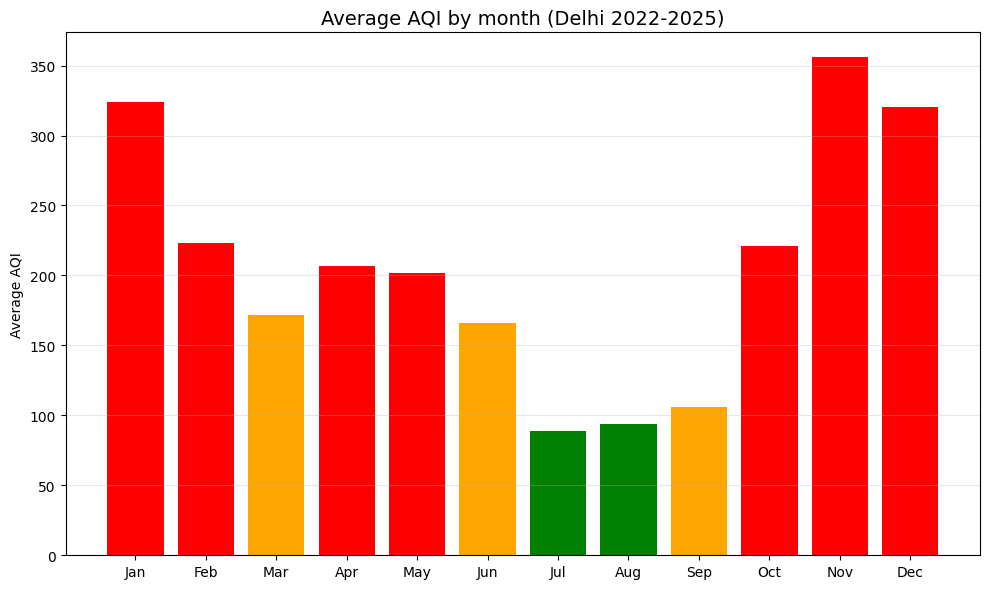

In [69]:
# Chart 2: Monthly Average 

monthly_avg = merged.groupby("month")["AQI"].mean()
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

colors = ['green' if x<=100 else 'orange' if x<=200 else 'red' for x in monthly_avg]

plt.figure(figsize=(10,6))
plt.bar(monthly_avg.index, monthly_avg.values, color=colors )
plt.xticks(range(1,13),months)
plt.title('Average AQI by month (Delhi 2022-2025)',fontsize=14)
plt.ylabel('Average AQI',fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/outputs/02_monthly_averages.png', dpi=300)






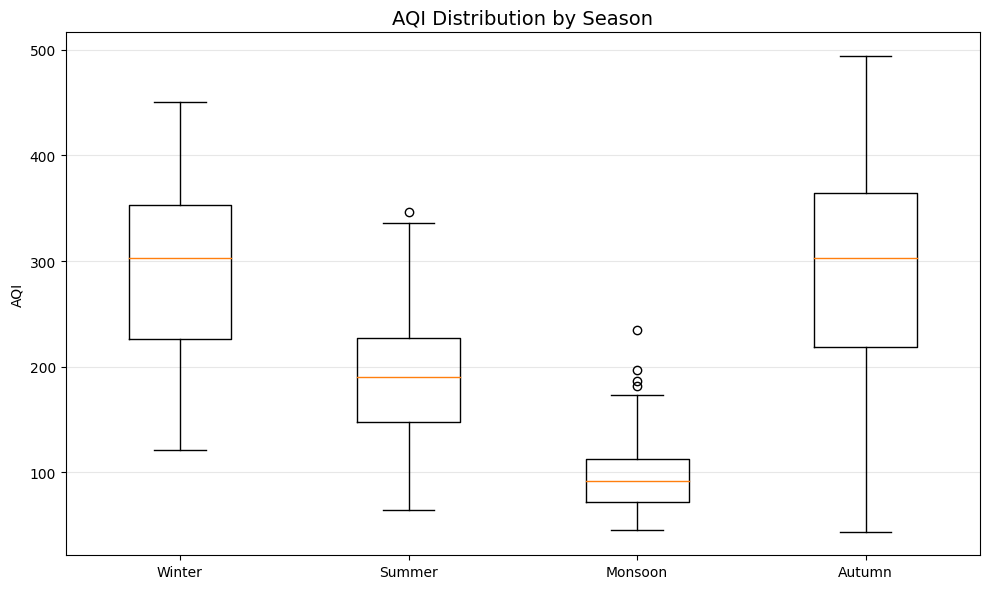

In [77]:
# Chart 3: Seasonal Boxplots

plt.figure(figsize=(10,6))
season_order = ['Winter','Summer','Monsoon','Autumn']



#building data using the present seasons
season_data = [
    merged[merged['season'] == s]['AQI'].values
    for s in season_order
]

plt.boxplot(season_data, labels=season_order)
plt.title('AQI Distribution by Season', fontsize=14)
plt.ylabel('AQI')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('../data/outputs/03_seasonal_boxplots.png', dpi=300)


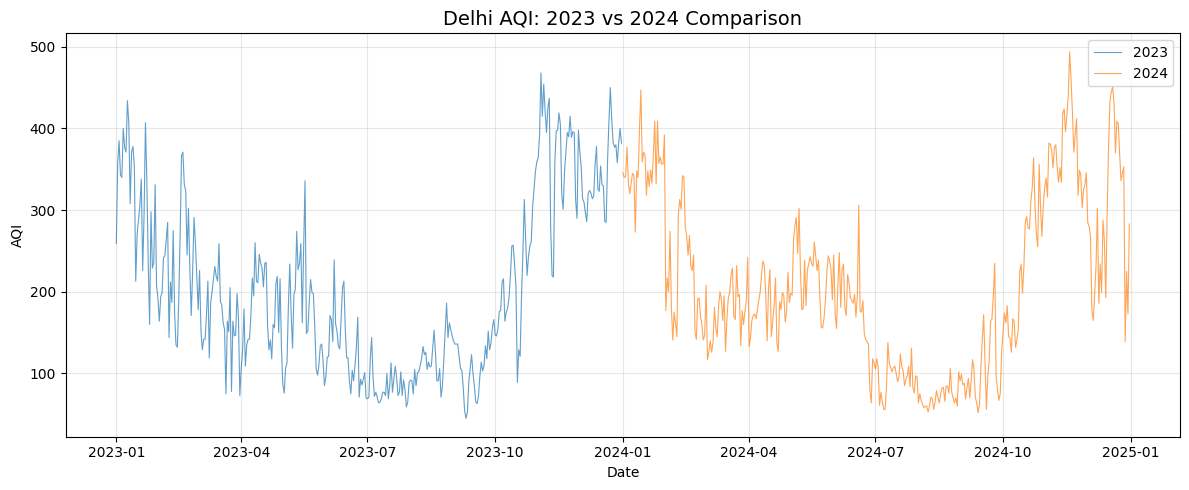

In [98]:
# Save as: outputs/04_2023_vs_2024.png
df_2023 = merged[merged['year'] == 2023]
df_2024 = merged[merged['year'] == 2024]

plt.figure(figsize=(12, 5))
plt.plot(df_2023['date'], df_2023['AQI'], label='2023', alpha=0.7, linewidth=0.8)
plt.plot(df_2024['date'], df_2024['AQI'], label='2024', alpha=0.7, linewidth=0.8)
plt.title('Delhi AQI: 2023 vs 2024 Comparison', fontsize=14)
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/outputs/04_2023_vs_2024.png', dpi=300)